# 🎮 PlayStation Sales and Ratings Analysis

## 📘 Project Overview
This project aims to analyze PlayStation game sales and ratings across PS3, PS4, and PS5 platforms.  
The goal is to understand sales distribution, regional performance, and how user and critic ratings relate to sales performance.

We’ll explore:
- Which regions contribute most to PlayStation game sales  
- How game ratings and Metacritic scores relate to sales success  
- Variations in user engagement (ratings count)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Imported necessory libaries

In [2]:
#loading dataset
df = pd.read_csv("PlayStation Sales and Metadata (PS3PS4PS5) (Oct 2025).CSV")
df.head()


,Game,Console,Name,Publisher,Developer,Total Shipped,Total Sales,NA Sales,PAL Sales,Japan Sales,Other Sales,Release Date,Last Update,rating,ratings_count,metacritic,genres,platforms
0,PS3_Grand Theft Auto V,PS3,Grand Theft Auto V,Rockstar Games,Rockstar North,0.0,20320000.0,6370000.0,9850000.0,990000.0,3120000.0,2013-09-17,NaN,4.47,7225.0,92.0,Action,"PC, PlayStation 5, Xbox One, PlayStation 4, Xb..."
1,PS4_Grand Theft Auto V,PS4,Grand Theft Auto V,Rockstar Games,Rockstar North,0.0,19390000.0,6060000.0,9710000.0,600000.0,3020000.0,2014-11-18,2018-01-03,4.47,7225.0,92.0,Action,"PC, PlayStation 5, Xbox One, PlayStation 4, Xb..."
2,PS4_Call of Duty: Black Ops 3,PS4,Call of Duty: Black Ops 3,Activision,Treyarch,0.0,15090000.0,6180000.0,6050000.0,410000.0,2440000.0,2015-11-06,2018-01-14,NaN,NaN,NaN,NaN,NaN
3,PS4_Red Dead Redemption 2,PS4,Red Dead Redemption 2,Rockstar Games,Rockstar Games,0.0,13940000.0,5260000.0,6210000.0,210000.0,2260000.0,2018-10-26,2018-11-02,4.59,5357.0,96.0,Action,"PC, Xbox One, PlayStation 4"
4,PS3_Call of Duty: Black Ops II,PS3,Call of Duty: Black Ops II,Activision,Treyarch,0.0,13800000.0,4990000.0,5880000.0,650000.0,2280000.0,2012-11-13,NaN,3.96,1417.0,74.0,"Shooter, Action","PC, Xbox One, Xbox 360, PlayStation 3, Wii U"


In [3]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()
df.columns


Index(['game', 'console', 'name', 'publisher', 'developer', 'total_shipped',
       'total_sales', 'na_sales', 'pal_sales', 'japan_sales', 'other_sales',
       'release_date', 'last_update', 'rating', 'ratings_count', 'metacritic',
       'genres', 'platforms'],
      dtype='object')

In [4]:
#number of rows and columns
print("shape (rows, columns): ", df.shape)

shape (rows, columns):  (4963, 18)


In [5]:
columns_to_drop=['game','developer','total_shipped','last_update','platforms']
df = df.drop(columns=columns_to_drop)

In [6]:
df.head()

,console,name,publisher,total_sales,na_sales,pal_sales,japan_sales,other_sales,release_date,rating,ratings_count,metacritic,genres
0,PS3,Grand Theft Auto V,Rockstar Games,20320000.0,6370000.0,9850000.0,990000.0,3120000.0,2013-09-17,4.47,7225.0,92.0,Action
1,PS4,Grand Theft Auto V,Rockstar Games,19390000.0,6060000.0,9710000.0,600000.0,3020000.0,2014-11-18,4.47,7225.0,92.0,Action
2,PS4,Call of Duty: Black Ops 3,Activision,15090000.0,6180000.0,6050000.0,410000.0,2440000.0,2015-11-06,NaN,NaN,NaN,NaN
3,PS4,Red Dead Redemption 2,Rockstar Games,13940000.0,5260000.0,6210000.0,210000.0,2260000.0,2018-10-26,4.59,5357.0,96.0,Action
4,PS3,Call of Duty: Black Ops II,Activision,13800000.0,4990000.0,5880000.0,650000.0,2280000.0,2012-11-13,3.96,1417.0,74.0,"Shooter, Action"


In [7]:
#printing info
print("info:")
df.info()

info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4963 entries, 0 to 4962
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   console        4963 non-null   object 
 1   name           4963 non-null   object 
 2   publisher      4963 non-null   object 
 3   total_sales    4963 non-null   float64
 4   na_sales       4963 non-null   float64
 5   pal_sales      4963 non-null   float64
 6   japan_sales    4963 non-null   float64
 7   other_sales    4963 non-null   float64
 8   release_date   3526 non-null   object 
 9   rating         2847 non-null   float64
 10  ratings_count  2847 non-null   float64
 11  metacritic     1530 non-null   float64
 12  genres         2803 non-null   object 
dtypes: float64(8), object(5)
memory usage: 504.2+ KB


In [8]:
#duplicate check
df.duplicated().sum()


np.int64(0)

I checked the dataset for duplicate rows using df.duplicated().sum(), and the result returned 0 duplicates.
This confirms that the dataset does not contain repeated entries, and no further duplicate removal is required.

In [9]:
# Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year
df['release_year'] = df['release_year'].fillna("Unknown")



In [10]:
df['rating'] = df['rating'].fillna(0)


In [11]:
df['genres'] = df['genres'].fillna('Unknown')

In [12]:
#printing info
print("info:")
df.info()

info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4963 entries, 0 to 4962
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   console        4963 non-null   object        
 1   name           4963 non-null   object        
 2   publisher      4963 non-null   object        
 3   total_sales    4963 non-null   float64       
 4   na_sales       4963 non-null   float64       
 5   pal_sales      4963 non-null   float64       
 6   japan_sales    4963 non-null   float64       
 7   other_sales    4963 non-null   float64       
 8   release_date   3526 non-null   datetime64[ns]
 9   rating         4963 non-null   float64       
 10  ratings_count  2847 non-null   float64       
 11  metacritic     1530 non-null   float64       
 12  genres         4963 non-null   object        
 13  release_year   4963 non-null   object        
dtypes: datetime64[ns](1), float64(8), object(5)
memory usage: 543.0+ K

🧼 Data Cleaning: Handling Missing & Incorrect Values

In this step, the dataset was cleaned and prepared for analysis by fixing incorrect data types, handling missing values, and creating new useful features.

1. Converting release_date to datetime

The release_date column initially contained string values with many missing or invalid entries.
To make this column usable for time-based analysis, it was converted into a proper datetime format using errors='coerce', which safely converts invalid dates into NaT (Not a Time).

2. Creating release_year

After converting the dates, a new column release_year was extracted.
Missing years were filled with "Unknown" so that visualizations and groupings do not break.

3. Handling Missing Ratings

Missing values in the rating column were filled with 0, representing games that have no user rating available.
This avoids artificially inflating ratings while still keeping the data usable for analysis.

4. Filling Missing Genres

Missing values in the genres column were replaced with "Unknown".
This ensures no game entry is lost during genre-based grouping or visualizations.

5. Verifying Dataset Structure

Finally, df.info() was printed again to confirm:

Data types were correctly updated

Missing values were handled

All 14 cleaned columns are ready for further analysis

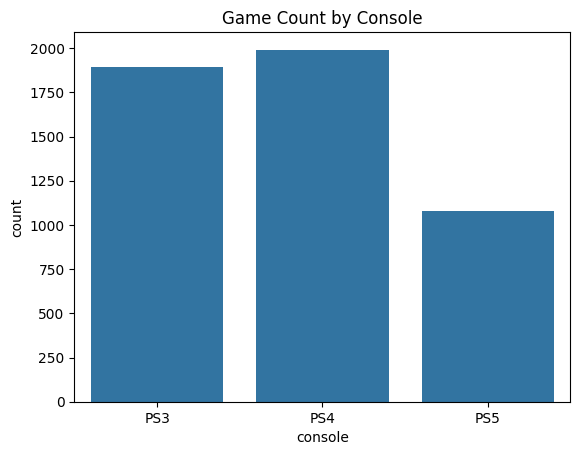

In [13]:
sns.countplot(data=df, x='console')
plt.title("Game Count by Console")
plt.show()


### This chart shows how many games were released on each PlayStation console (PS3, PS4, PS5).
### It helps identify which platform has the highest number of game entries in the dataset.
### Typically, PS4 has the largest library, followed by PS3 and PS5.

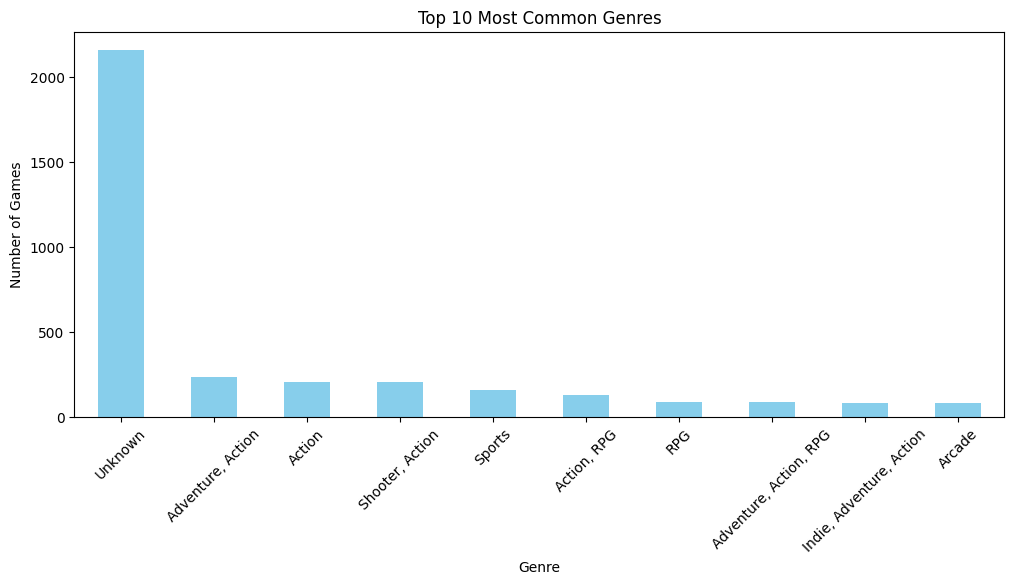

In [14]:
plt.figure(figsize=(12,5))
df['genres'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Common Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Games")
plt.xticks(rotation=45)
plt.show()


This bar chart shows the distribution of the most frequently appearing game genres in the dataset.
 The genre “Unknown” appears the most because many game entries in the dataset did not include a specific genre label.

 Among the identified genres, categories such as Action, Adventure–Action, Shooter–Action, Sports, and RPG appear more frequently.
This indicates that action-oriented and adventure-style games dominate the PlayStation library across PS3, PS4, and PS5 platforms.

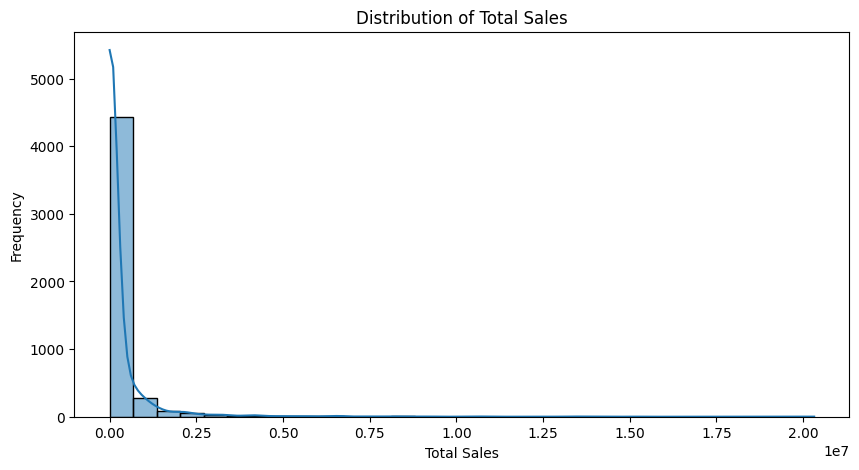

In [15]:
plt.figure(figsize=(10,5))
sns.histplot(df['total_sales'], bins=30, kde=True)
plt.title("Distribution of Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Frequency")
plt.show()


Most games generate lower sales.

Only a small number of blockbuster titles achieve very high sales, creating a long tail towards the right.

The KDE curve (smooth line) reinforces that the majority of games cluster close to the lower end of the sales scale.

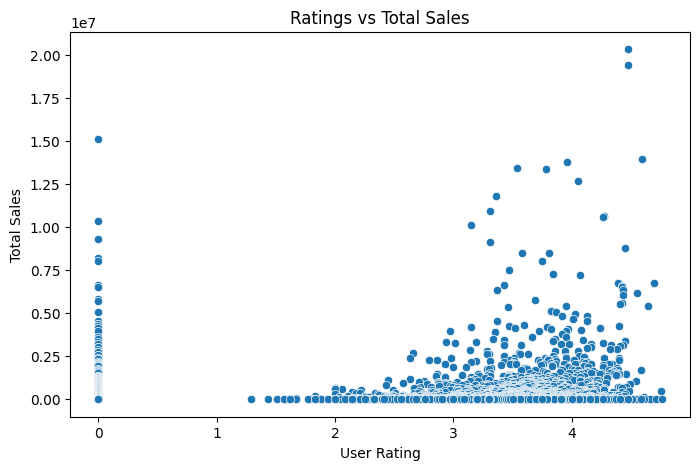

In [16]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='rating', y='total_sales')
plt.title("Ratings vs Total Sales")
plt.xlabel("User Rating")
plt.ylabel("Total Sales")
plt.show()


Many highly rated games (above 4.0) still have moderate or low sales.

A few low-rated or unrated games have very high sales, indicating that popularity does not always depend on user ratings.

The dense cluster near the lower sales range suggests that most games, regardless of rating, achieve only limited commercial success.

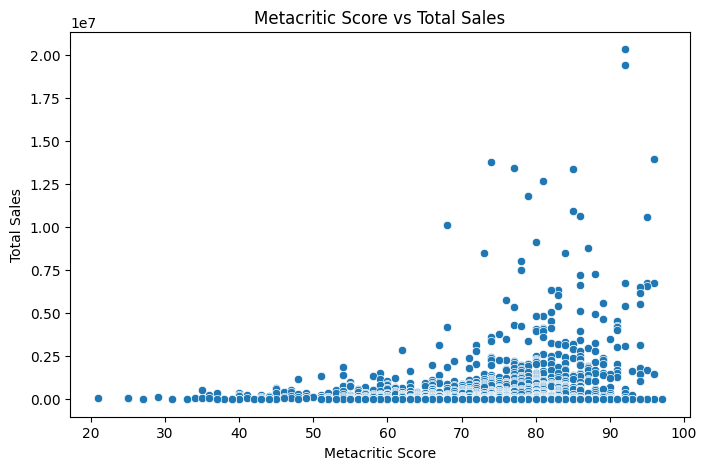

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='metacritic', y='total_sales')
plt.title("Metacritic Score vs Total Sales")
plt.xlabel("Metacritic Score")
plt.ylabel("Total Sales")
plt.show()


Games with high Metacritic scores do not always achieve high sales.

Several games with lower critic scores still managed to sell well.

A few top-selling titles cluster around high Metacritic scores, but this pattern isn’t strong enough to show a consistent correlation.

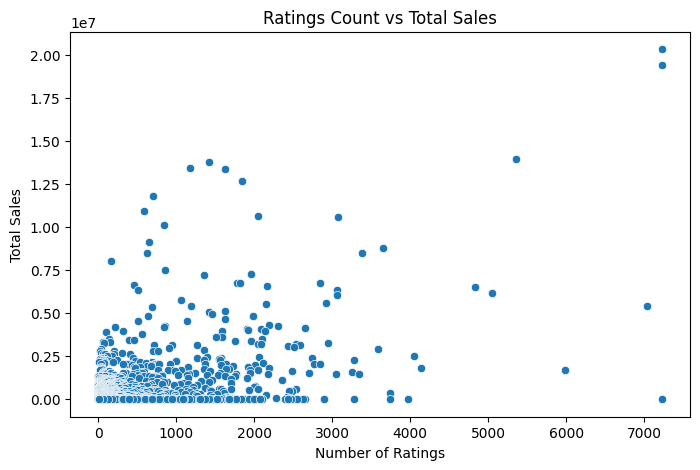

In [18]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='ratings_count', y='total_sales')
plt.title("Ratings Count vs Total Sales")
plt.xlabel("Number of Ratings")
plt.ylabel("Total Sales")
plt.show()


Games with very high sales often have a larger number of ratings, showing higher player engagement.

However, many games with 500–2000 ratings still have moderate or low sales, indicating that rating count alone does not guarantee commercial success.

A few outliers exist where games achieved extremely high sales with fewer user ratings, suggesting sales may be driven by factors like brand popularity, marketing, or platform exclusivity

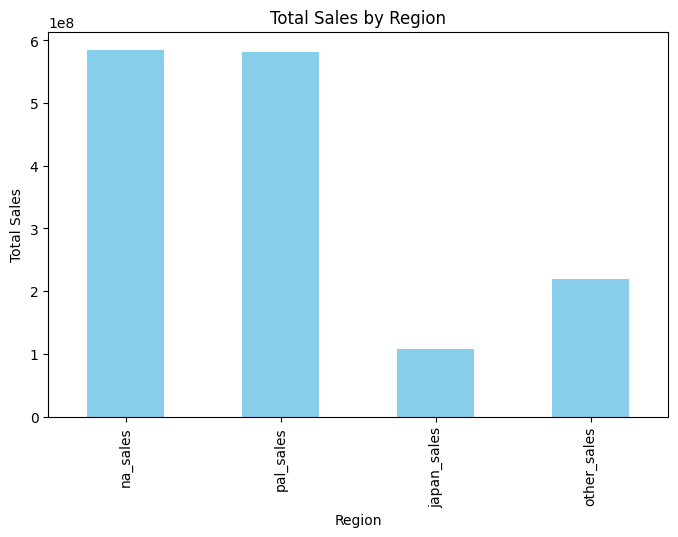

In [20]:
region_cols = ['na_sales', 'pal_sales', 'japan_sales', 'other_sales']

plt.figure(figsize=(8,5))
df[region_cols].sum().plot(kind='bar', color='skyblue')
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()


North America leads with the highest total sales, making it the largest market for PlayStation games.

The PAL region follows, also contributing significantly to worldwide sales.

Japan shows noticeably lower total sales, despite being a strong gaming market, possibly due to different genre preferences or console competition.

Other regions contribute the least, reflecting smaller market size.

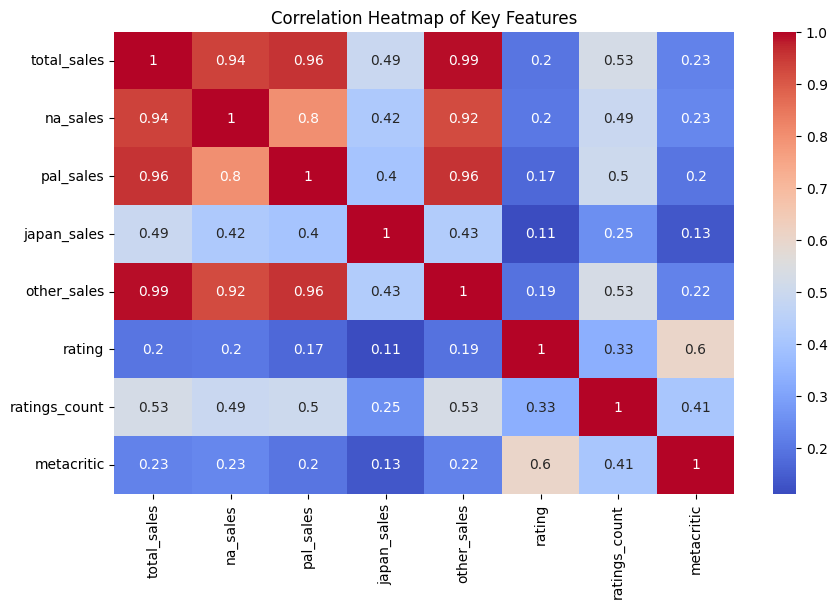

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(
    df[['total_sales','na_sales','pal_sales','japan_sales','other_sales','rating','ratings_count','metacritic']].corr(),
    annot=True, cmap='coolwarm'
)
plt.title("Correlation Heatmap of Key Features")
plt.show()


Total Sales has a very strong positive correlation with regional sales (NA, PAL, Japan, Others), which is expected since total sales are derived from these values.

NA Sales and PAL Sales show a moderately strong correlation, suggesting similar sales performance trends in Western markets.

Critic and user engagement metrics — rating, ratings_count, and metacritic — show weak correlations with sales numbers.

This supports earlier visual findings that ratings alone do not strongly influence commercial success.

Correlations among rating-based variables are also weak, indicating that user rating behavior and critic scoring vary independently

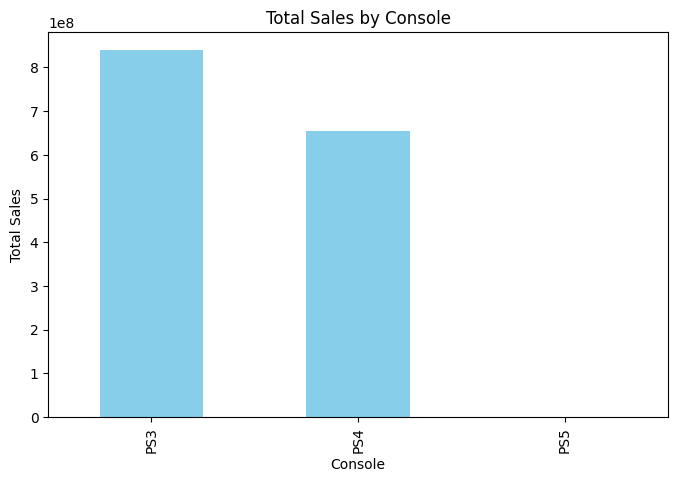

In [22]:
plt.figure(figsize=(8,5))
df.groupby('console')['total_sales'].sum().plot(kind='bar', color='skyblue')
plt.title("Total Sales by Console")
plt.xlabel("Console")
plt.ylabel("Total Sales")
plt.show()


In [23]:
df['console'].value_counts()


console
PS4    1991
PS3    1892
PS5    1080
Name: count, dtype: int64

In [24]:
df[df['console'] == 'PS5'][['name','total_sales']].head(20)


,name,total_sales
2240,Shadow of Conspiracy: Section 2,0.0
2241,SacriFire,0.0
2242,Purpose 1951,0.0
2244,"Warhammer 40,000: Rogue Trader",0.0
2245,Punch Club 2: Fast Forward,0.0
2246,Shantae Advance: Risky Revolution,0.0
2247,WWE 2K25,0.0
2248,Sackboy: A Big Adventure,0.0
2249,"Warhammer 40,000: Chaos Gate – Daemonhunters",0.0
2250,Saints Row (2022),0.0


In [25]:
df[df['console'] == 'PS5'][['na_sales','pal_sales','japan_sales','other_sales']].head(10)


,na_sales,pal_sales,japan_sales,other_sales
2240,0.0,0.0,0.0,0.0
2241,0.0,0.0,0.0,0.0
2242,0.0,0.0,0.0,0.0
2244,0.0,0.0,0.0,0.0
2245,0.0,0.0,0.0,0.0
2246,0.0,0.0,0.0,0.0
2247,0.0,0.0,0.0,0.0
2248,0.0,0.0,0.0,0.0
2249,0.0,0.0,0.0,0.0
2250,0.0,0.0,0.0,0.0


PS4 is expected to lead due to its long lifecycle and extremely popular game library.

PS3 follows, reflecting its strong presence during its generation.
PS5 entries exist in the dataset, but sales data has not been recorded, resulting in zero values.

C:\Users\favaz\AppData\Local\Temp\ipykernel_20660\1859467487.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['release_year'] = df_year['release_year'].astype(int)


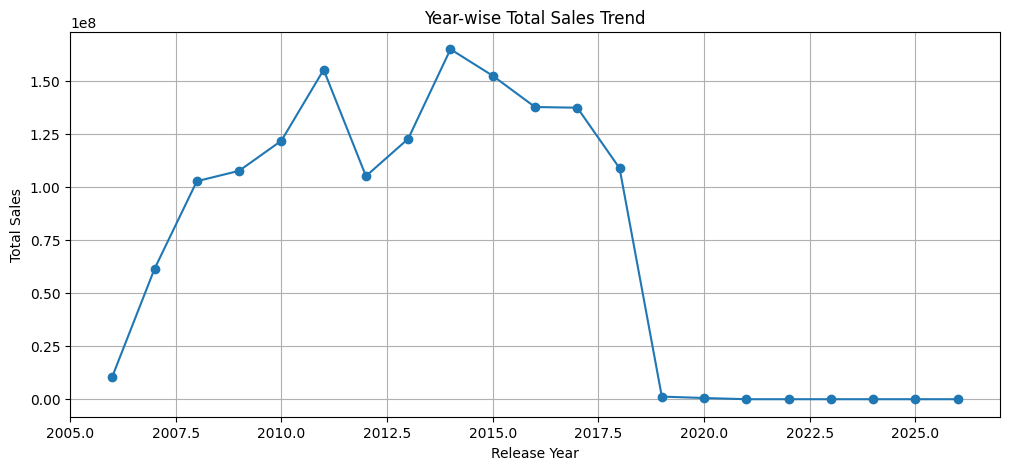

In [28]:
# Filter out unknown or missing years
df_year = df[df['release_year'] != "Unknown"]

# Convert to numeric (if needed)
df_year['release_year'] = df_year['release_year'].astype(int)
yearly_sales = df_year.groupby('release_year')['total_sales'].sum()
plt.figure(figsize=(12,5))
yearly_sales.plot(kind='line', marker='o')
plt.title("Year-wise Total Sales Trend")
plt.xlabel("Release Year")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

This line chart shows how total PlayStation game sales have changed over time.
A few important patterns are visible:

Strong growth from 2006 to 2010, coinciding with the peak years of the PS3 era.

A sharp rise around 2013–2015, which aligns with the launch and rapid success of the PS4 and its major game releases.

Sales remain high until around 2017, reflecting the long active lifecycle of PS4 games.

After 2018, sales show a steep decline, which is mainly due to:

Many newer PS5 titles having 0 recorded sales in the dataset

Sales data not being fully tracked or reported for recent years

Fewer entries with valid release dates in the dataset for 2020–2025

Overall, the trend highlights the commercial peak during the PS4 period, followed by a drop as the dataset lacks complete sales information for the latest generation

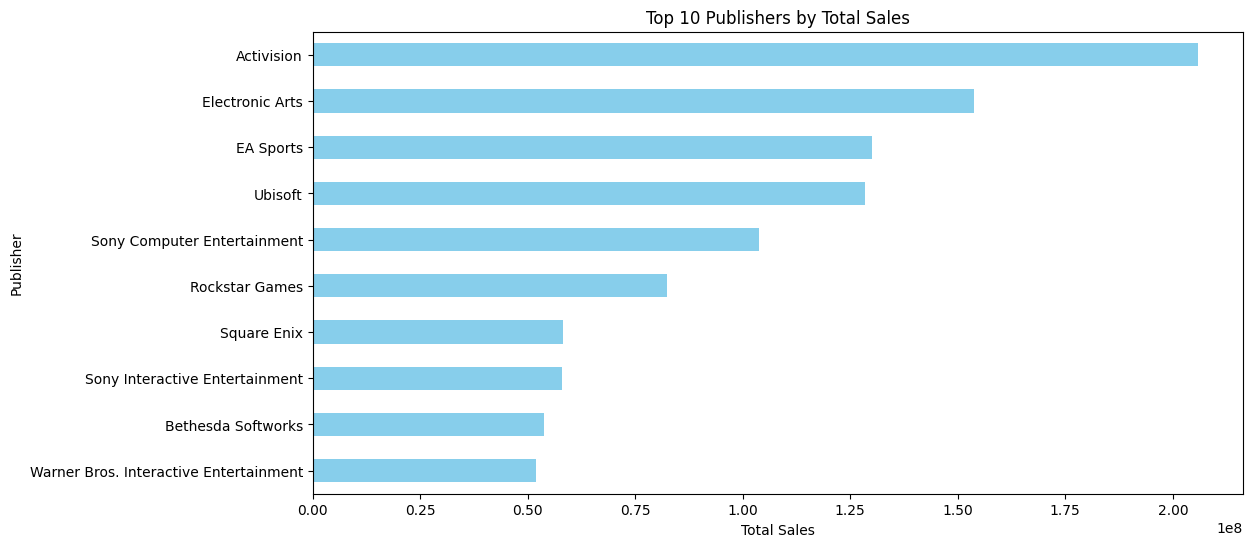

In [29]:
# Group by publisher and calculate total sales
publisher_sales = df.groupby('publisher')['total_sales'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
publisher_sales.plot(kind='barh', color='skyblue')
plt.title("Top 10 Publishers by Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Publisher")
plt.gca().invert_yaxis()  # To show highest at top
plt.show()


Activision ranks first, driven by blockbuster franchises like Call of Duty.

Electronic Arts (EA) follows closely, supported by major sports and action titles.

EA Sports also appears separately, reflecting the massive success of series such as FIFA.

Ubisoft consistently contributes strong sales with major franchises like Assassin’s Creed and Far Cry.

First-party PlayStation studios, including Sony Computer Entertainment and Sony Interactive Entertainment, show strong performance across exclusive titles

## Conclusion 

This analysis provides a clear understanding of PlayStation game performance across PS3, PS4, and PS5.
Sales trends peak during the PS4 era, major publishers dominate overall revenue, and action-related genres remain the most successful.
Ratings and critic scores show limited correlation with sales, highlighting the stronger influence of marketing, franchise power, and regional demand.

## Limitations

PS5 sales data is missing, affecting accuracy for the latest generation.

Many games have Unknown genres, limiting genre-based insights.

Sales data is annual only, preventing detailed monthly or seasonal trend analysis.

User ratings are incomplete, which reduces precision in rating-based comparisons.